# Exploratory Data Analysis for Amazon Dataset

## Introduction

In this notebook, we will perform exploratory data analysis (EDA) on the Amazon review and metadata datasets. The goal is to extract insights that will inform the development of a graph-based recommendation system.

## Data Fields

### For User Reviews

| Field             | Type   | Explanation                                                                                           |
|-------------------|--------|-------------------------------------------------------------------------------------------------------|
| `rating`          | float  | Rating of the product (from 1.0 to 5.0).                                                              |
| `title`           | str    | Title of the user review.                                                                             |
| `text`            | str    | Text body of the user review.                                                                         |
| `images`          | list   | Images that users post after they have received the product. Each image has different sizes (small, medium, large), represented by the `small_image_url`, `medium_image_url`, and `large_image_url` respectively. |
| `asin`            | str    | ID of the product.                                                                                    |
| `parent_asin`     | str    | Parent ID of the product. Note: Products with different colors, styles, sizes usually belong to the same parent ID. The “asin” in previous Amazon datasets is actually parent ID. Please use parent ID to find product meta. |
| `user_id`         | str    | ID of the reviewer.                                                                                   |
| `timestamp`       | int    | Time of the review (unix time).                                                                       |
| `verified_purchase` | bool | User purchase verification.                                                                           |
| `helpful_vote`    | int    | Helpful votes of the review.                                                                          |

### For Item Metadata

| Field             | Type   | Explanation                                                                                           |
|-------------------|--------|-------------------------------------------------------------------------------------------------------|
| `main_category`   | str    | Main category (i.e., domain) of the product.                                                          |
| `title`           | str    | Name of the product.                                                                                  |
| `average_rating`  | float  | Rating of the product shown on the product page.                                                      |
| `rating_number`   | int    | Number of ratings in the product.                                                                     |
| `features`        | list   | Bullet-point format features of the product.                                                          |
| `description`     | list   | Description of the product.                                                                           |
| `price`           | float  | Price in US dollars (at time of crawling).                                                            |
| `images`          | list   | Images of the product. Each image has different sizes (thumb, large, hi_res). The “variant” field shows the position of image. |
| `videos`          | list   | Videos of the product including title and url.                                                        |
| `store`           | str    | Store name of the product.                                                                            |
| `categories`      | list   | Hierarchical categories of the product.                                                               |
| `details`         | dict   | Product details, including materials, brand, sizes, etc.                                              |
| `parent_asin`     | str    | Parent ID of the product.                                                                             |
| `bought_together` | list   | Recommended bundles from the websites.                                                                |

## Loading the Data

We will start by loading the review and metadata files into pandas DataFrames.


In [10]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

def load_jsonl_to_dataframe(file_path):
    with open(file_path, 'r') as f:
        data = [json.loads(line) for line in f]
    return pd.DataFrame(data)


# Load the review and metadata data
review_file = '../Data/amazon-all-beauty/All_Beauty.jsonl'
metadata_file = '../Data/amazon-all-beauty/meta_All_Beauty.jsonl'

reviews_df = load_jsonl_to_dataframe(review_file)
metadata_df = load_jsonl_to_dataframe(metadata_file)

## Merging the Data
# We will merge the review and metadata DataFrames on the `asin` column to enrich our analysis.
merged_df = pd.merge(reviews_df, metadata_df, on='parent_asin', how='left')



## Exploratory Data Analysis

### 1. Distribution of Ratings
What is the overall distribution of ratings in the dataset?


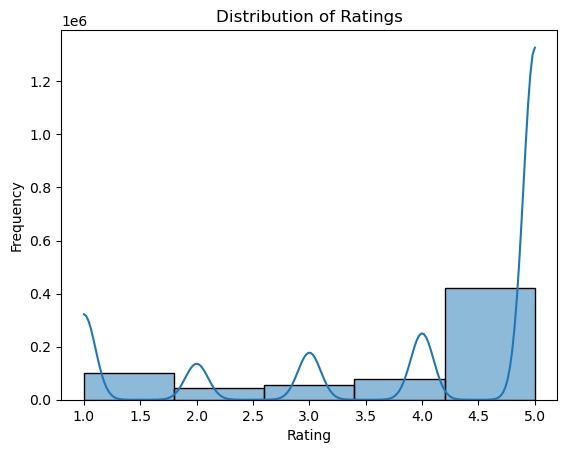

In [11]:

# 1. Distribution of Ratings
sns.histplot(merged_df['rating'], bins=5, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()



### 2. User Activity
How many reviews does each user contribute?


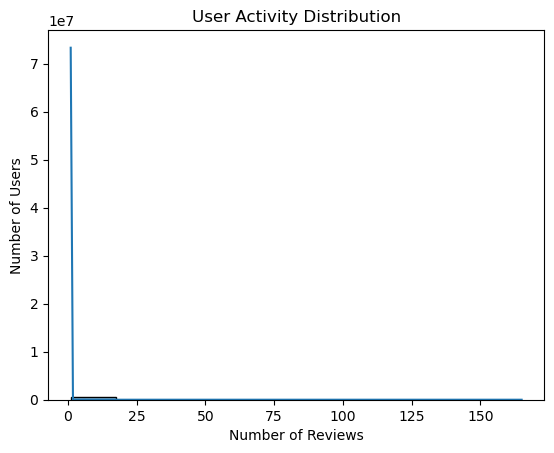

In [17]:
# 2. User Activity
user_activity = reviews_df['user_id'].value_counts()
sns.histplot(user_activity, bins=10, kde=True)
plt.title('User Activity Distribution')
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Users')
plt.show()



### 3. Item Popularity
How many reviews does each item receive?


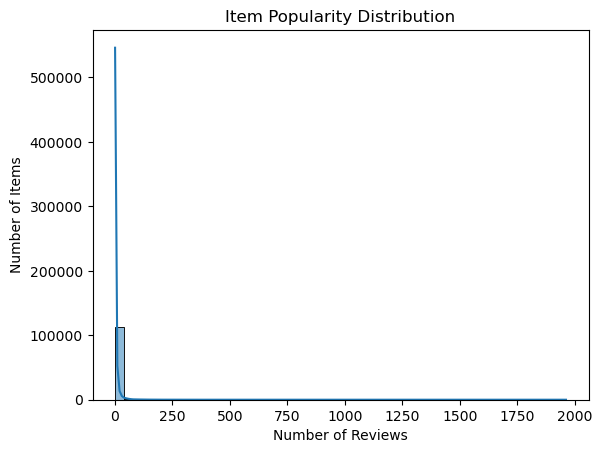

In [18]:
# 3. Item Popularity
item_popularity = reviews_df['asin'].value_counts()
sns.histplot(item_popularity, bins=50, kde=True)
plt.title('Item Popularity Distribution')
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Items')
plt.show()



### 4. Text Analysis
What is the sentiment distribution of the reviews?


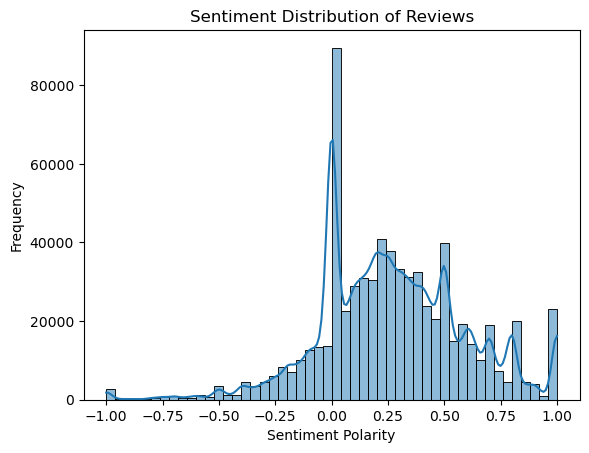

In [27]:
# 9. Text Analysis
reviews_df['sentiment'] = reviews_df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
sns.histplot(reviews_df['sentiment'], bins=50, kde=True)
plt.title('Sentiment Distribution of Reviews')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()